# Stellarator Plasma Boundary Explorer

In this notebook we initialize two plasma boundaries with different parameters and compare their shapes, surfaces, and equilibrium properties using various visualization techniques.

In [ ]:
import pathlib
from constellaration import forward_model, initial_guess
from constellaration.boozer import boozer
from constellaration.utils import (
    file_exporter,
    visualization,
    visualization_utils,
)

## Initialization of Plasma Boundaries

In [8]:
compact_boundary = initial_guess.generate_rotating_ellipse(
    aspect_ratio=3, elongation=0.5, rotational_transform=0.4, n_field_periods=3
)
elongated_boundary = initial_guess.generate_rotating_ellipse(
    aspect_ratio=5, elongation=1.5, rotational_transform=0.4, n_field_periods=3
)

## Boundary surfaces

In [9]:
%matplotlib agg
# Use 'agg' backend for non-interactive plotting
compact_boundary_plot = visualization.plot_boundary(compact_boundary)
elongated_boundary_plot = visualization.plot_boundary(elongated_boundary)

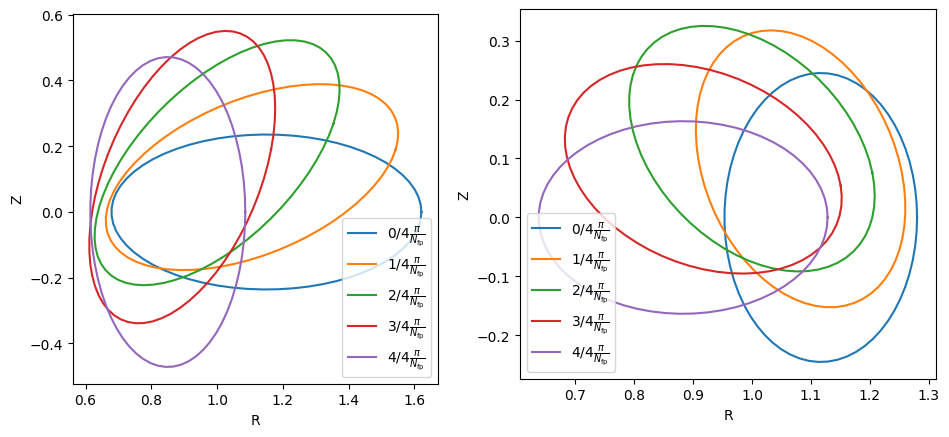

In [10]:
_ = visualization_utils.combine_figures_side_by_side(
    compact_boundary_plot, elongated_boundary_plot
)

## Boundary shape

In [11]:
compact_surface_plot = visualization.plot_surface(compact_boundary)
elongated_fig = visualization.plot_surface(elongated_boundary)
visualization_utils.combine_plotly_figures_side_by_side(
    compact_surface_plot, elongated_fig
)

## High fidelity metrics

In [12]:
settings = forward_model.ConstellarationSettings.default_high_fidelity_skip_qi()
compact_boundary_metrics, compact_boundary_equilibrium = forward_model.forward_model(
    compact_boundary, settings=settings
)
elongated_boundary_metrics, elongated_boundary_equilibrium = (
    forward_model.forward_model(elongated_boundary, settings=settings)
)
visualization_utils.print_dicts_side_by_side(
    compact_boundary_metrics.model_dump(),
    elongated_boundary_metrics.model_dump(),
)

## Boozer plots

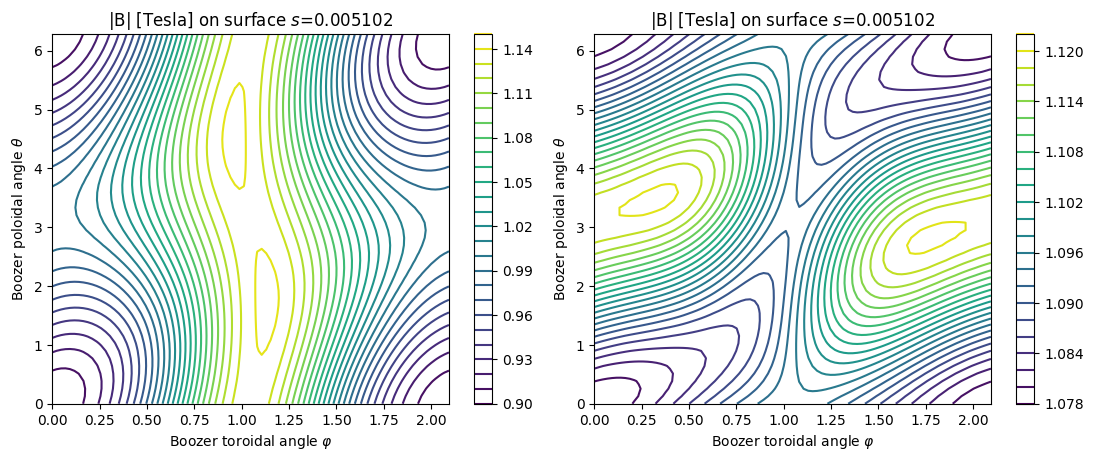

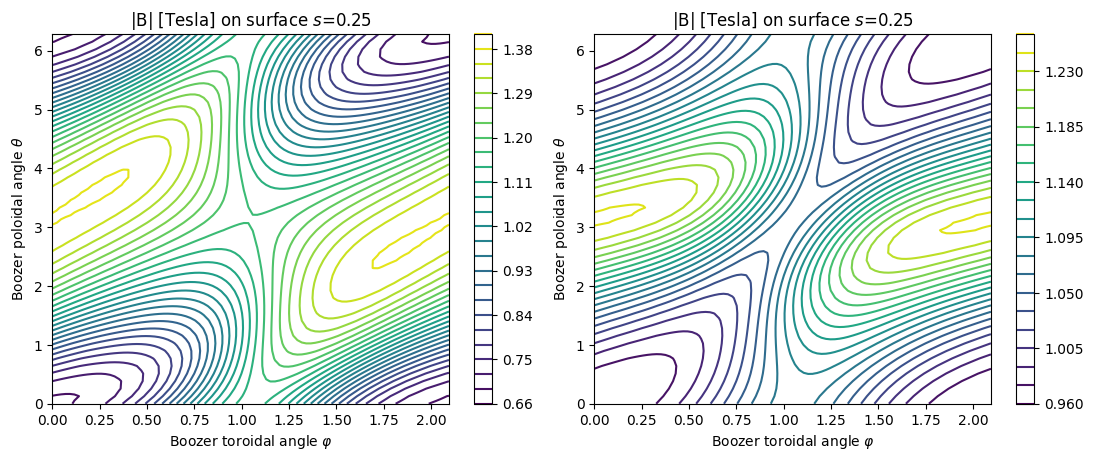

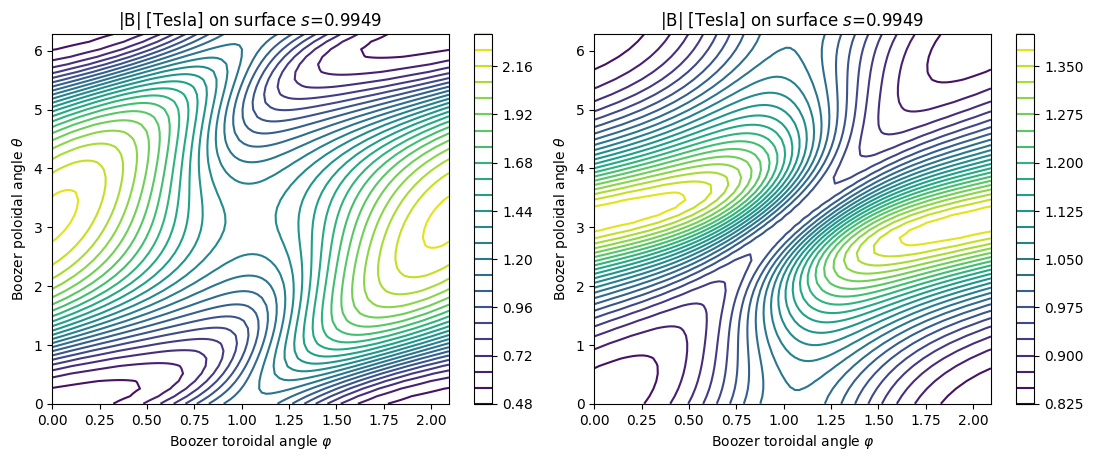

In [13]:
boozer_settings = boozer.BoozerSettings(normalized_toroidal_flux=[0.0, 0.25, 1])
compact_boundary_boozer_plots = visualization.plot_boozer_surfaces(
    compact_boundary_equilibrium, settings=boozer_settings
)
elongated_boundary_boozer_plots = visualization.plot_boozer_surfaces(
    elongated_boundary_equilibrium, settings=boozer_settings
)
for compact_fig, elongated_fig in zip(
    compact_boundary_boozer_plots, elongated_boundary_boozer_plots
):
    _ = visualization_utils.combine_figures_side_by_side(compact_fig, elongated_fig)

## Flux surfaces

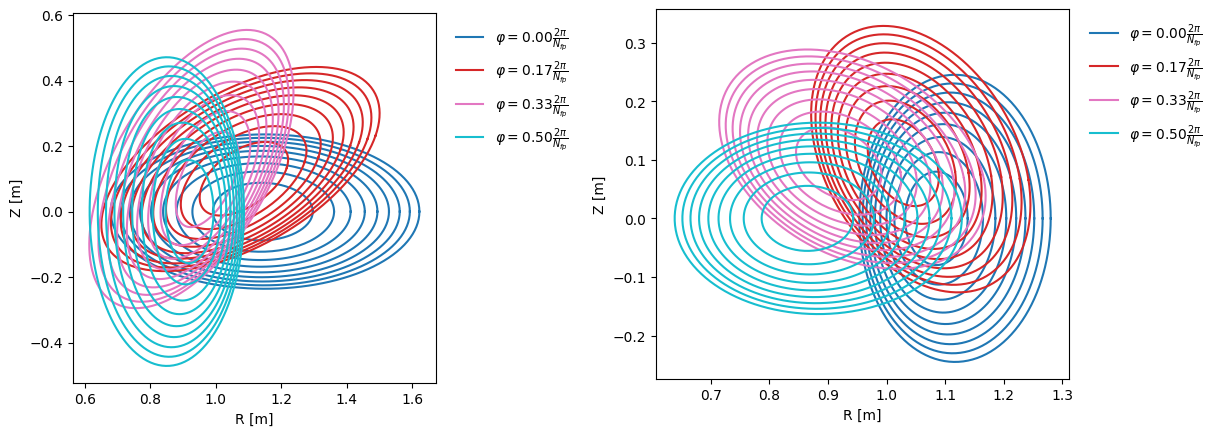

In [14]:
compact_flux_surfaces_plot = visualization.plot_flux_surfaces(
    compact_boundary_equilibrium, compact_boundary
)
elongated_boundary_flux_surfaces_plot = visualization.plot_flux_surfaces(
    elongated_boundary_equilibrium, elongated_boundary
)
visualization_utils.combine_figures_side_by_side(
    compact_flux_surfaces_plot, elongated_boundary_flux_surfaces_plot
)

## Export to wout file

In [ ]:
file_exporter.to_vmec2000_wout_file(
    compact_boundary_equilibrium,
    pathlib.Path("compact_boundary.nc"),
)
file_exporter.to_vmec2000_wout_file(
    elongated_boundary_equilibrium,
    pathlib.Path("elongated_boundary.nc"),
)